In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

In [14]:
df = pd.read_csv("../summary_data/original/all_tools_TRB_diversity.csv")
# Calculate normalized Shannon-Wiener index
df['normalized_shannon_index_TCR'] = df['shannon_index_TCR']/np.log(df['clonotype_count_TCR'])
df['normalized_shannon_index_tool'] = df['shannon_index_tool']/np.log(df['clonotype_count_tool'])
df['normalized_absolute_error'] = np.abs(df['normalized_shannon_index_TCR'] - df['normalized_shannon_index_tool'])
df

,Sample,shannon_index_tool,clonotype_count_tool,tool,shannon_index_TCR,clonotype_count_TCR,repertoire_type,tissue,tissue_type,absolute_error,class,normalized_shannon_index_TCR,normalized_shannon_index_tool,normalized_absolute_error
0,CMT-baseline1C_CAGATC,3.438804,34,MIXCR,8.172351,9354,polyclonal,melanoma,T_cell_poor,4.733547,T_cell_poor_polyclonal,0.893782,0.975171,0.081389
1,CMT-baseline1C_CAGATC,4.406335,92,IMREP,8.172351,9354,polyclonal,melanoma,T_cell_poor,3.766016,T_cell_poor_polyclonal,0.893782,0.974467,0.080685
2,CMT-baseline1C_CAGATC,5.024401,200,TRUST4,8.172351,9354,polyclonal,melanoma,T_cell_poor,3.147950,T_cell_poor_polyclonal,0.893782,0.948301,0.054519
3,ESO1-sorted-T-cells_S13_L007,0.829164,2592,MIXCR,1.072675,3001,monoclonal,PBMC,T_cell_rich,0.243510,T_cell_rich_monoclonal,0.133972,0.105489,0.028483
4,ESO1-sorted-T-cells_S13_L007,1.163479,3682,IMREP,1.072675,3001,monoclonal,PBMC,T_cell_rich,0.090805,T_cell_rich_monoclonal,0.133972,0.141694,0.007722
5,ESO1-sorted-T-cells_S13_L007,1.165598,4154,TRUST4,1.072675,3001,monoclonal,PBMC,T_cell_rich,0.092923,T_cell_rich_monoclonal,0.133972,0.139897,0.005925
6,INY1-sorted-T-cells_S14_L007,0.988740,1565,MIXCR,1.001202,3229,monoclonal,PBMC,T_cell_rich,0.012462,T_cell_rich_monoclonal,0.123912,0.134419,0.010507
7,INY1-sorted-T-cells_S14_L007,2.440028,4392,IMREP,1.001202,3229,monoclonal,PBMC,T_cell_rich,1.438827,T_cell_rich_monoclonal,0.123912,0.290911,0.166999
8,INY1-sorted-T-cells_S14_L007,2.222923,5275,TRUST4,1.001202,3229,monoclonal,PBMC,T_cell_rich,1.221721,T_cell_rich_monoclonal,0.123912,0.259362,0.135450
9,INY2-sorted-T-cells_S15_L007,0.792264,1012,MIXCR,0.960516,7697,monoclonal,PBMC,T_cell_rich,0.168253,T_cell_rich_monoclonal,0.107337,0.114494,0.007157


In [15]:
T_cell_poor_monoclonal = pd.read_csv("../summary_data/subsample/T_cell_poor_monoclonal_diversity.csv")
df_combined = pd.concat([df,T_cell_poor_monoclonal],ignore_index=True,sort=False)
df_combined

,Sample,shannon_index_tool,clonotype_count_tool,tool,shannon_index_TCR,clonotype_count_TCR,repertoire_type,tissue,tissue_type,absolute_error,class,normalized_shannon_index_TCR,normalized_shannon_index_tool,normalized_absolute_error
0,CMT-baseline1C_CAGATC,3.438804,34,MIXCR,8.172351,9354.0,polyclonal,melanoma,T_cell_poor,4.733547,T_cell_poor_polyclonal,0.893782,0.975171,0.081389
1,CMT-baseline1C_CAGATC,4.406335,92,IMREP,8.172351,9354.0,polyclonal,melanoma,T_cell_poor,3.766016,T_cell_poor_polyclonal,0.893782,0.974467,0.080685
2,CMT-baseline1C_CAGATC,5.024401,200,TRUST4,8.172351,9354.0,polyclonal,melanoma,T_cell_poor,3.147950,T_cell_poor_polyclonal,0.893782,0.948301,0.054519
3,ESO1-sorted-T-cells_S13_L007,0.829164,2592,MIXCR,1.072675,3001.0,monoclonal,PBMC,T_cell_rich,0.243510,T_cell_rich_monoclonal,0.133972,0.105489,0.028483
4,ESO1-sorted-T-cells_S13_L007,1.163479,3682,IMREP,1.072675,3001.0,monoclonal,PBMC,T_cell_rich,0.090805,T_cell_rich_monoclonal,0.133972,0.141694,0.007722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,insilco_sample2,0.363360,1,IMREP,1.001202,NaN,monoclonal,NaN,T_cell_poor,0.637842,T_cell_poor_monoclonal,NaN,NaN,NaN
61,insilco_sample2,0.364596,1,TRUST4,1.001202,NaN,monoclonal,NaN,T_cell_poor,0.636605,T_cell_poor_monoclonal,NaN,NaN,NaN
62,insilco_sample3,0.452226,3,MIXCR,0.960516,NaN,monoclonal,NaN,T_cell_poor,0.508290,T_cell_poor_monoclonal,NaN,NaN,NaN
63,insilco_sample3,0.384446,2,IMREP,0.960516,NaN,monoclonal,NaN,T_cell_poor,0.576071,T_cell_poor_monoclonal,NaN,NaN,NaN


Compare TCR-Seq-based Shannon Diversity Index

In [3]:
# shannon_index_TCR = df[['Sample','shannon_index_TCR','repertoire_type','class']].drop_duplicates(keep='first')

In [4]:
# x = stats.normaltest(shannon_index_TCR['shannon_index_TCR'])
# x

NormaltestResult(statistic=3.015236181726475, pvalue=0.22143679261753232)

In [5]:
# mean_shannon = shannon_index_TCR.groupby("repertoire_type")["shannon_index_TCR"].agg(["mean", "std"])
# display(mean_shannon)

,mean,std
repertoire_type,,
monoclonal,1.011464,0.056779
polyclonal,6.942179,2.182487


In [6]:
# df_group1 = shannon_index_TCR[shannon_index_TCR['repertoire_type'] == 'monoclonal']
# df_group2 = shannon_index_TCR[shannon_index_TCR['repertoire_type'] == 'polyclonal']
# stats.ttest_ind(df_group1['shannon_index_TCR'], df_group2['shannon_index_TCR'])

Ttest_indResult(statistic=-4.602388931180543, pvalue=0.0002210846580359512)

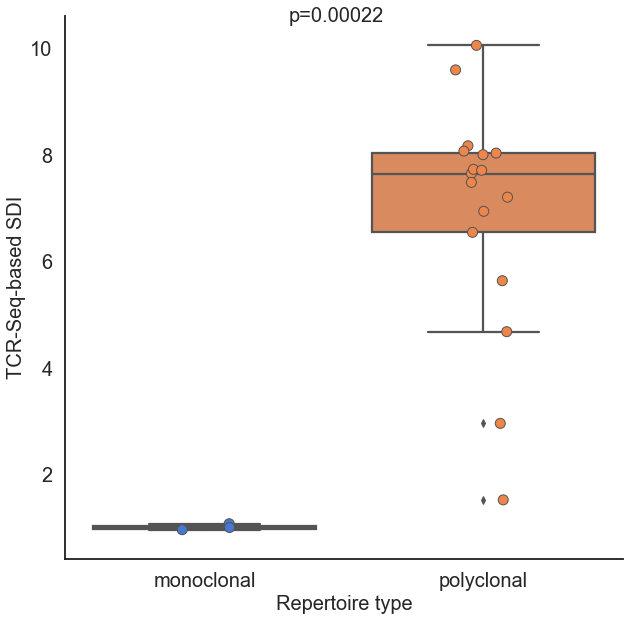

In [7]:
# sns.set_style("white") 
# sns.set_context("talk")  

# ax = plt.subplots(figsize = (10,10))
# ax = sns.boxplot(x='repertoire_type',y='shannon_index_TCR',data=shannon_index_TCR,palette="muted",
#                  order=['monoclonal','polyclonal'])
# sns.stripplot(x="repertoire_type",y="shannon_index_TCR",data=shannon_index_TCR,s=10,color=".3",palette="muted",dodge=True,
#               linewidth=1,order=['monoclonal','polyclonal'])
# ax.set_xlabel('Repertoire type',fontsize=20)
# ax.set_ylabel('TCR-Seq-based SDI',fontsize=20)
# plt.text(0.3,10.5,'p=0.00022',fontsize=20)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# sns.despine()
# plt.show()

SDI comparison in T cell rich tissues

In [16]:
T_cell_rich = df_combined.loc[(df_combined['tissue_type'] == 'T_cell_rich')]

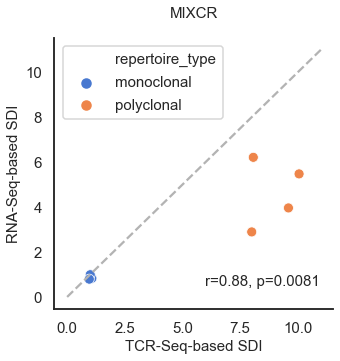

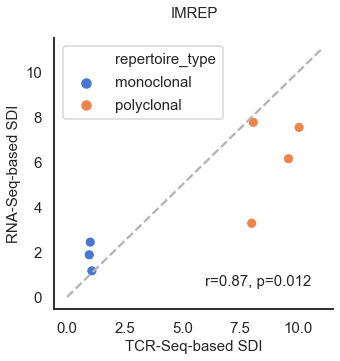

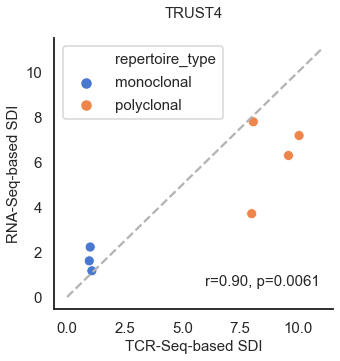

In [17]:
tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    T_cell_rich_fig = T_cell_rich.loc[(T_cell_rich['tool'] == tool)]
    f, ax = plt.subplots(figsize=(5, 5))
    g = sns.set_style("white") 
    g = sns.set_context("talk") 
    g = sns.scatterplot(x='shannon_index_TCR', y='shannon_index_tool', hue='repertoire_type', s=100, data=T_cell_rich_fig, palette=['#4878d0', '#ee854a'])
    g = sns.lineplot(x=range(0,12),y=range(0,12),color=".7")
    g.lines[0].set_linestyle("--")
    
    g.axes.set_title(tool,fontsize=15,y=1.05)
    g.set_xlabel("TCR-Seq-based SDI",fontsize=15)
    g.set_ylabel("RNA-Seq-based SDI",fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.tick_params(axis='both', which='minor', labelsize=15)
    plt.setp(ax.get_legend().get_texts(), fontsize=15) 
    plt.setp(ax.get_legend().get_title(), fontsize=15)
    sns.despine()
 
    r, p = stats.pearsonr(T_cell_rich_fig['shannon_index_TCR'], T_cell_rich_fig['shannon_index_tool'])
    plt.text(6,0.5,'r={:.2f}, p={:.2g}'.format(r, p),fontsize=15)

SDI comparison in T poor tissues

In [18]:
T_cell_poor = df_combined.loc[(df_combined['tissue_type'] == 'T_cell_poor')]

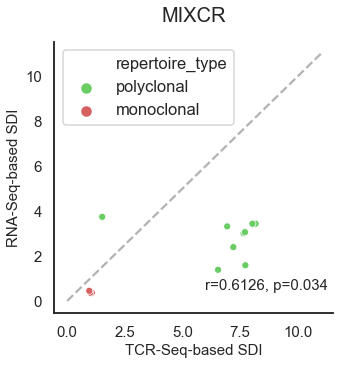

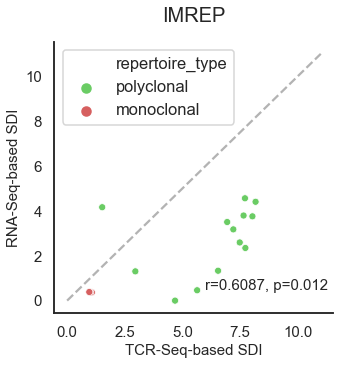

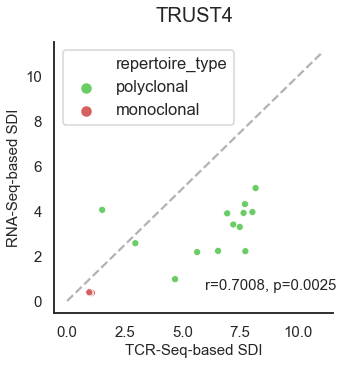

In [19]:
tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    T_cell_poor_fig = T_cell_poor.loc[(T_cell_poor['tool'] == tool)]
    f, ax = plt.subplots(figsize=(5, 5))
    g = sns.set_style("white") 
    g = sns.set_context("talk") 
    g = sns.scatterplot(x='shannon_index_TCR', y='shannon_index_tool', hue='repertoire_type', s=50, data=T_cell_poor_fig,palette=['#6acc64','#d65f5f'])
    g = sns.lineplot(x=range(0,12),y=range(0,12),color=".7")
    g.lines[0].set_linestyle("--")
    
    g.axes.set_title(tool,fontsize=20,y=1.05)
    g.set_xlabel("TCR-Seq-based SDI",fontsize=15)
    g.set_ylabel("RNA-Seq-based SDI",fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.tick_params(axis='both', which='minor', labelsize=15)
    sns.despine()
 
    r, p = stats.pearsonr(T_cell_poor_fig['shannon_index_TCR'], T_cell_poor_fig['shannon_index_tool'])
    plt.text(6,0.5,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=15)

SDI comparison in monoclonal repertoires

In [20]:
monoclonal_repertoires = df_combined.loc[(df_combined['repertoire_type'] == 'monoclonal')]

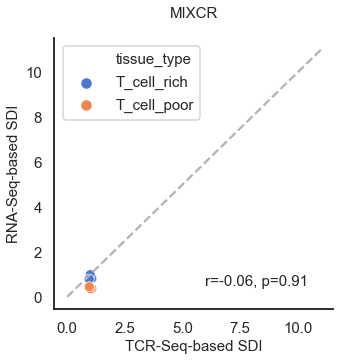

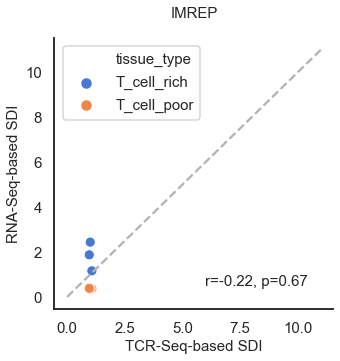

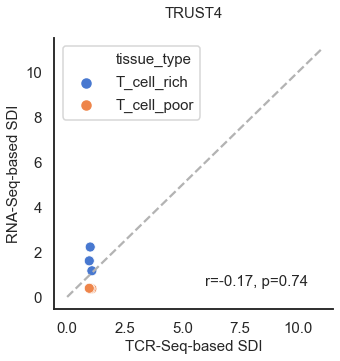

In [21]:
tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    monoclonal_fig = monoclonal_repertoires.loc[(monoclonal_repertoires['tool'] == tool)]
    f, ax = plt.subplots(figsize=(5, 5))
    g = sns.set_style("white") 
    g = sns.set_context("talk") 
    g = sns.scatterplot(x='shannon_index_TCR', y='shannon_index_tool', hue='tissue_type', s=100, data=monoclonal_fig, palette=['#4878d0', '#ee854a'])
    g = sns.lineplot(x=range(0,12),y=range(0,12),color=".7")
    g.lines[0].set_linestyle("--")
    
    g.axes.set_title(tool,fontsize=15,y=1.05)
    g.set_xlabel("TCR-Seq-based SDI",fontsize=15)
    g.set_ylabel("RNA-Seq-based SDI",fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.tick_params(axis='both', which='minor', labelsize=15)
    plt.setp(ax.get_legend().get_texts(), fontsize=15) 
    plt.setp(ax.get_legend().get_title(), fontsize=15)
    sns.despine()
 
    r, p = stats.pearsonr(monoclonal_fig['shannon_index_TCR'], monoclonal_fig['shannon_index_tool'])
    plt.text(6,0.5,'r={:.2f}, p={:.2g}'.format(r, p),fontsize=15)

Absolute error of SDI in T cell rich tissues

In [22]:
mean_absolute_error = T_cell_rich['absolute_error'].mean()
print("Mean")
display(mean_absolute_error)

mean_absolute_error_std = T_cell_rich['absolute_error'].std()
print("STD")
display(mean_absolute_error_std)

mean_absolute_error_tool = T_cell_rich.groupby("tool")["absolute_error"].agg(["mean", "std"])
display(mean_absolute_error_tool)

Mean


2.0828926468771365

STD


1.928539325450083

,mean,std
tool,,
IMREP,1.917580,1.719708
MIXCR,2.515544,2.519936
TRUST4,1.815554,1.660249


Absolute error of SDI in different classes of repertoires

In [23]:
mean_repertoire_absolute_error = df_combined.groupby("class")["absolute_error"].agg(["mean", "std"])
display(mean_repertoire_absolute_error)
tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools:  
    print(tool)
    df_tool = df_combined.loc[df_combined['tool'] == tool]
    mean_repertoire_absolute_error = df_tool.groupby("class")["absolute_error"].agg(["mean", "std"]) 
    display(mean_repertoire_absolute_error)

,mean,std
class,,
T_cell_poor_monoclonal,0.631787,0.069360
T_cell_poor_polyclonal,3.944897,1.165676
T_cell_rich_monoclonal,0.536683,0.539731
T_cell_rich_polyclonal,3.242550,1.768416


MIXCR


,mean,std
class,,
T_cell_poor_monoclonal,0.615752,0.099843
T_cell_poor_polyclonal,4.508950,1.077323
T_cell_rich_monoclonal,0.141408,0.117840
T_cell_rich_polyclonal,4.296145,1.681364


IMREP


,mean,std
class,,
T_cell_poor_monoclonal,0.640302,0.065495
T_cell_poor_polyclonal,4.012572,1.101935
T_cell_rich_monoclonal,0.814811,0.679551
T_cell_rich_polyclonal,2.744656,1.865142


TRUST4


,mean,std
class,,
T_cell_poor_monoclonal,0.639308,0.066374
T_cell_poor_polyclonal,3.486723,1.179376
T_cell_rich_monoclonal,0.653830,0.564431
T_cell_rich_polyclonal,2.686848,1.714251


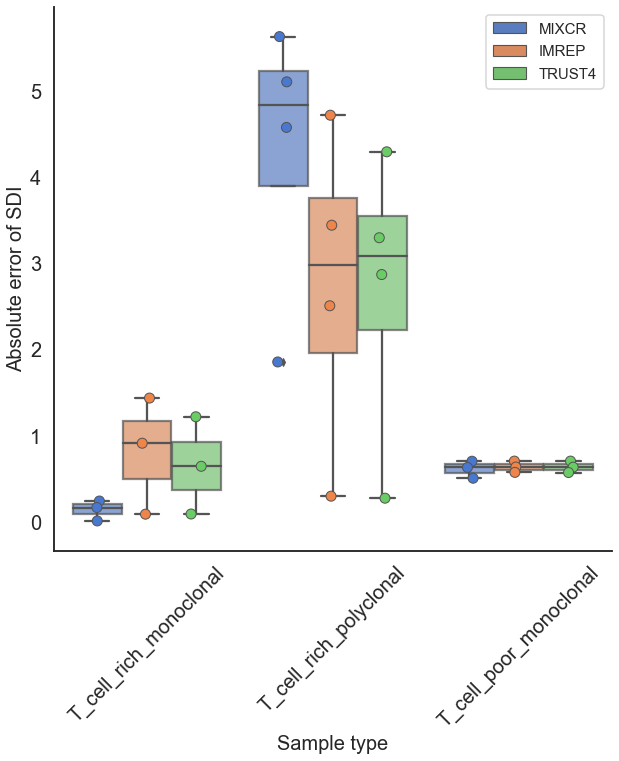

In [24]:
sns.set_style("white") 
sns.set_context("talk")  

ax = plt.subplots(figsize = (10,10))
fig = df_combined.loc[(df_combined['class'] != 'T_cell_poor_polyclonal')]
ax = sns.boxplot(x='class',y='absolute_error',data=fig,palette="muted",hue='tool',boxprops=dict(alpha=0.7))
sns.stripplot(x="class",y="absolute_error",data=fig,s=10,color=".3",palette="muted",hue='tool',dodge=True,linewidth=1)
ax.set_xlabel('Sample type',fontsize=20)
ax.set_ylabel('Absolute error of SDI',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1, 1))
plt.setp(ax.get_legend().get_texts(), fontsize=15) 
plt.setp(ax.get_legend().get_title(), fontsize=15)
sns.despine()
plt.show()

Absolute error of normalized SDI in T cell rich tissues

In [25]:
mean_repertoire_absolute_error = df.groupby("class")["normalized_absolute_error"].agg(["mean", "std"])
display(mean_repertoire_absolute_error)
tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools:
    print(tool)
    df_tool = df.loc[df['tool'] == tool]
    mean_clonotype_tool = df_tool.groupby("class")["normalized_absolute_error"].agg(["mean", "std"]) 
    display(mean_clonotype_tool)

,mean,std
class,,
T_cell_poor_polyclonal,0.143478,0.113680
T_cell_rich_monoclonal,0.063502,0.064747
T_cell_rich_polyclonal,0.056316,0.044407


MIXCR


,mean,std
class,,
T_cell_poor_polyclonal,0.153529,0.122182
T_cell_rich_monoclonal,0.015382,0.011468
T_cell_rich_polyclonal,0.050898,0.040766


IMREP


,mean,std
class,,
T_cell_poor_polyclonal,0.165713,0.126200
T_cell_rich_monoclonal,0.099028,0.082162
T_cell_rich_polyclonal,0.068678,0.060566


TRUST4


,mean,std
class,,
T_cell_poor_polyclonal,0.115997,0.097975
T_cell_rich_monoclonal,0.076097,0.065437
T_cell_rich_polyclonal,0.049373,0.039917


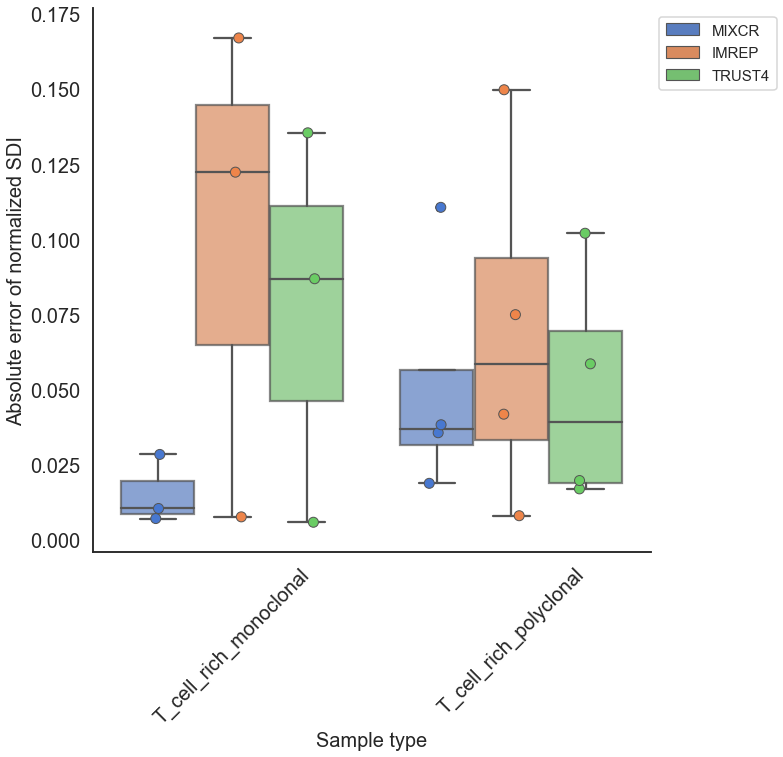

In [26]:
sns.set_style("white") 
sns.set_context("talk")  

ax = plt.subplots(figsize = (10,10))
ax = sns.boxplot(x='class',y='normalized_absolute_error',data=T_cell_rich,palette="muted",hue='tool',boxprops=dict(alpha=0.7))
sns.stripplot(x="class",y="normalized_absolute_error",data=T_cell_rich,s=10,color=".3",palette="muted",hue='tool',dodge=True,linewidth=1)
ax.set_xlabel('Sample type',fontsize=20)
ax.set_ylabel('Absolute error of normalized SDI',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1, 1))
plt.setp(ax.get_legend().get_texts(), fontsize=15) 
plt.setp(ax.get_legend().get_title(), fontsize=15)
sns.despine()
plt.show()

Absolute error of SDI in different tissue types

In [27]:
mean_tissue_absolute_error = df.groupby("tissue")["absolute_error"].agg(["mean", "std"]) 
display(mean_tissue_absolute_error)
tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    print(tool)
    df_tool = df.loc[df['tool'] == tool]
    mean_tissue_absolute_error = df_tool.groupby("tissue")["absolute_error"].agg(["mean", "std"]) 
    display(mean_tissue_absolute_error)

,mean,std
tissue,,
PBMC,1.876464,1.978871
kidney,3.293777,1.901000
lymph_node,3.321462,1.105723
melanoma,4.119417,0.966870
small_intestine,3.734630,0.803423


MIXCR


,mean,std
tissue,,
PBMC,2.171305,2.573847
lymph_node,4.580975,NaN
melanoma,4.491219,1.150302
small_intestine,4.650803,NaN


IMREP


,mean,std
tissue,,
PBMC,1.818763,1.861948
kidney,3.907126,1.957398
lymph_node,2.510478,NaN
melanoma,4.143538,0.864360
small_intestine,3.150218,NaN


TRUST4


,mean,std
tissue,,
PBMC,1.639324,1.745518
kidney,2.680428,2.018540
lymph_node,2.872934,NaN
melanoma,3.764805,0.857962
small_intestine,3.402869,NaN


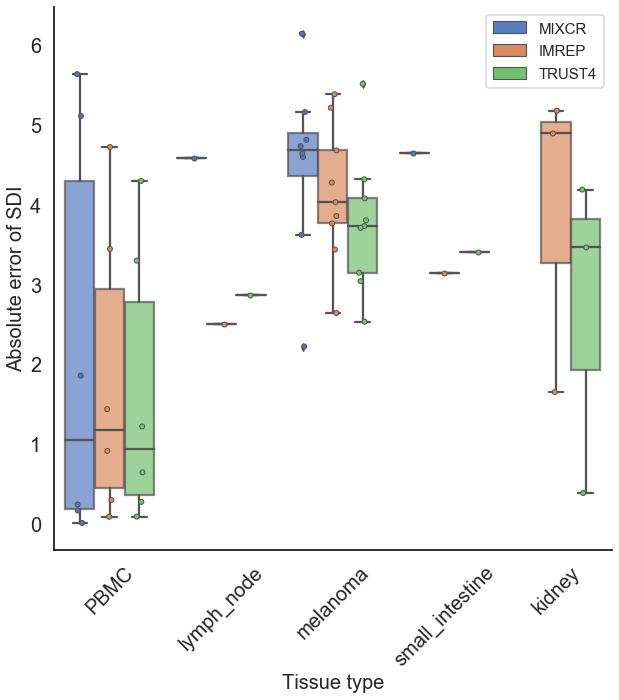

In [28]:
sns.set_style("white") 
sns.set_context("talk")  

ax = plt.subplots(figsize = (10,10))
ax = sns.boxplot(x='tissue',y='absolute_error',data=df,palette="muted",hue='tool',
                order=['PBMC','lymph_node','melanoma','small_intestine','kidney'],boxprops=dict(alpha=.7))
sns.stripplot(x="tissue",y="absolute_error",data=df,s = 5,color=".3",palette="muted",hue='tool',
              dodge=True,linewidth=1,order=['PBMC','lymph_node','melanoma','small_intestine','kidney'])
ax.set_xlabel('Tissue type',fontsize=20)
ax.set_ylabel('Absolute error of SDI',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1, 1))
plt.setp(ax.get_legend().get_texts(), fontsize=15) 
plt.setp(ax.get_legend().get_title(), fontsize=15)
sns.despine()
plt.show()

In [19]:
# tools = ['MIXCR','IMREP','TRUST4']              
# for tool in tools: 
#     figure_normalized_SDI = T_cell_rich.loc[(T_cell_rich['tool'] == tool)]
#     g = sns.set_style("white") 
#     g = sns.set_context("talk")  
#     g = sns.jointplot(data=figure_normalized_SDI, x="normalized_shannon_wiener_index_TCR", y="normalized_shannon_index_tool",kind="reg",scatter = False)
#     sns.scatterplot(data=figure_normalized_SDI,x="normalized_shannon_wiener_index_TCR", y="normalized_shannon_index_tool",hue="repertoire_type",s=30)
#     g.annotate(stats.pearsonr)
#     g.fig.suptitle(tool)
#     g.set_axis_labels('x', 'y', fontsize=20)
#     g.ax_joint.set_xlabel('TCR-Seq-based TCRB diversity')
#     g.ax_joint.set_ylabel('RNA-Seq-based TCRB diversity')